# Smoking, Cancer and causality

This notebook follows the famous example from *Causality* (Pearl, 2009).

A correlation has been observed between Smoking and Cancer, represented by this Bayesian network :

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [1]:
from IPython.display import display, Math, Latex,HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb



obs1 = gum.fastBN("Smoking->Cancer")

obs1.cpt("Smoking")[:]=[0.6,0.4]
obs1.cpt("Cancer")[{"Smoking":0}]=[0.9,0.1]
obs1.cpt("Cancer")[{"Smoking":1}]=[0.7,0.3]
                  
gnb.flow.row(obs1,obs1.cpt("Smoking")*obs1.cpt("Cancer"),obs1.cpt("Smoking"),obs1.cpt("Cancer"),
               captions=["the BN","the joint distribution","the marginal for $smoking$","the CPT for $cancer$"])


## Direct causality between Smoking and Cancer

The very strong observed correlation between smoking and lung cancer suggests a causal relationship as the Surgeon General asserts in 1964, then, the proposed model is as follows :

In [2]:
# the Bayesian network is causal
modele1=csl.CausalModel(obs1)

cslnb.showCausalImpact(modele1,"Cancer", "Smoking", values={"Smoking":1})


## Latent confounder between Smoking and Cancer

This model is highly contested by the tobacco industry which answers by proposing a different model in which Smoking and Cancer are simultaneously provoked by a common factor, the Genotype (or other latent variable) :

In [3]:
# a latent varible exists between Smoking and Cancer in the causal model
modele2 = csl.CausalModel(obs1, [("Genotype", ["Smoking","Cancer"])])

cslnb.showCausalImpact(modele2, "Cancer", "Smoking",values={"Smoking":1})


In [4]:
# just check P(Cancer) in the bn `obs1`
(obs1.cpt("Smoking")*obs1.cpt("Cancer")).margSumIn(["Cancer"])


(pyAgrum.Potential<double>@0x55efe23e9570) 
  Cancer           |
0        |1        |
---------|---------|
 0.8200  | 0.1800  |

## Confounder and direct causality

In a diplomatic effort, both parts agree that there must be some truth in both models :

In [5]:
# a latent variable exists between Smoking and Cancer but the direct causal relation exists also
modele3 = csl.CausalModel(obs1, [("Genotype", ["Smoking","Cancer"])], True)

cslnb.showCausalImpact(modele3, "Cancer", "Smoking",values={"Smoking":1})


Smoking's causal effect on Cancer becomes uncomputable in such a model because we can't distinguish both causes' impact from the observations.

## A intermediary observed variable
We introduce an auxilary factor between Smoking and Cancer, tobacco causes cancer because of the tar deposits in the lungs.

In [6]:
obs2 = gum.fastBN("Smoking->Tar->Cancer;Smoking->Cancer")

obs2.cpt("Smoking")[:] = [0.6, 0.4]
obs2.cpt("Tar")[{"Smoking": 0}] = [0.9, 0.1]
obs2.cpt("Tar")[{"Smoking": 1}] = [0.7, 0.3]
obs2.cpt("Cancer")[{"Tar": 0, "Smoking": 0}] = [0.9, 0.1]
obs2.cpt("Cancer")[{"Tar": 1, "Smoking": 0}] = [0.8, 0.2]
obs2.cpt("Cancer")[{"Tar": 0, "Smoking": 1}] = [0.7, 0.3]
obs2.cpt("Cancer")[{"Tar": 1, "Smoking": 1}] = [0.6, 0.4]

gnb.flow.row(obs2,obs2.cpt("Smoking"),obs2.cpt("Tar"),obs2.cpt("Cancer"),
               captions=["","$P(Smoking)$","$P(Tar|Smoking)$","$P(Cancer|Tar,Smoking)$"])


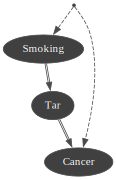

In [7]:
modele4 = csl.CausalModel(obs2, [("Genotype", ["Smoking","Cancer"])])
cslnb.showCausalModel(modele4)

In [8]:
cslnb.showCausalImpact(modele4, "Cancer", "Smoking",values={"Smoking":1})

In this model, we are, again, able to calculate the causal impact of Smoking on Cancer thanks to the verification of the Frontdoor criterion by the Tar relatively to the couple (Smoking, Cancer)

In [9]:
# just check P(Cancer|do(smoking)) in the bn `obs2`
((obs2.cpt("Cancer")*obs2.cpt("Smoking")).margSumOut(["Smoking"])*obs2.cpt("Tar")).margSumOut(['Tar']).putFirst("Cancer")


(pyAgrum.Potential<double>@0x55efe19d0470) 
      ||  Cancer           |
Smokin||0        |1        |
------||---------|---------|
0     || 0.8100  | 0.1900  |
1     || 0.7900  | 0.2100  |

## Other causal impacts for this last model 

In [10]:
cslnb.showCausalImpact(modele4, "Smoking", doing="Cancer",knowing={"Tar"}, values={"Cancer":1,"Tar":1})


In [11]:
cslnb.showCausalImpact(modele4, "Smoking", doing="Cancer",values={"Cancer":1})


In [12]:
cslnb.showCausalImpact(modele4, "Smoking", doing={"Cancer","Tar"},values={"Cancer":1,"Tar":1})


In [13]:
cslnb.showCausalImpact(modele4, "Tar", doing={"Cancer","Smoking"},values={"Cancer":1,"Smoking":1})
